In [1]:
# 이번 강의에선 좀 더 실전에 나올만한 문제들을 풀어봄

In [ ]:
# acmicpc.net/problem/9251

# 와우 이건 머리로도 안풀리는 유형인데 이게 난이도 '하' 면 '상'은 어느정도인거야

# 


In [7]:
# 선생님

# 이문제는 LCS라는 문제임

# 이 문제도 전형적이고 교과서에서도 볼 수 있는 문제

# 어느 교과서냐 

# 일단 시간복잡도는 O(N^2)으로 풀수 있음

# 우선 다음과 같이 일반항을 정의함.

# D[i][j] = X[0...i]와 Y[0...j]의 공통 부분 수열의 최대 길이

# 둘다 하나씩 올려가면서 공통 부분 수열의 길이를 구해나가는 거임.

# D[i][j] = D[i-1][j-1]+1               if X[i] = Y[j]
# D[i][j] = max(D[i][j-1], D[i-1][j])   if X[i] != Y[j]

# 일단 결론은 이렇게 풀면됨. 

# 값이 같으면 대각선 위쪽에서 +1 해주고
# 다르면 왼쪽, 위쪽 중 큰걸 써줌

# 이 선생님은 '왜' 를 좀 설명해줬으면 좋겠다
# '어떻게'는 답지 보면 알지

x= input()
y= input()

dp = [[0]*(len(y)+1) for _ in range(len(x)+1)] # 이번 테이블 만들땐 공집합 자리도 하나 주어야함

for i in range(1, len(x)+1):
    for j in range(1, len(y)+1):
        if x[i-1] == y[j-1]:
            dp[i][j] = dp[i-1][j-1]+1
        else:
            dp[i][j] = max(dp[i][j-1], dp[i-1][j])
            
print(dp[len(x)][len(y)])

ACAYKP
CAPCAK
4


In [8]:
dp

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 2, 2, 2],
 [0, 1, 2, 2, 2, 3, 3],
 [0, 1, 2, 2, 2, 3, 3],
 [0, 1, 2, 2, 2, 3, 4],
 [0, 1, 2, 3, 3, 3, 4]]

좋아 '왜'에 대한 부분은 내가 해설해줌

우선 전체 문자열 예시는 문제의 예시대로 쓴다.

a = ACAYKP

b = CAPCAK

여기서 이해해야될 포인트는 

1. i번째와 j번째가 다를때 왜 왼쪽, 위쪽 중 큰걸 가져오나
2. i번째와 j번째가 같을때 왜 대각선 위에서 +1을 하나

우선 1부터 설명 들어감. 일단<br>
ACAYKP & CAPC (i, j)<br>
이 두개를 비교할 때라고 보자. 비교중인 가장 끝 글자는 P, C다<br>
일단 다르다.<br>
다른데, 계산 순서에 의하면<br>
ACAYKP & CAP (i, j-1) <br>
ACAYK & CAPC (i-1, j)<br>
이 두개는 계산이 되어있다.<br>
근데 지금 비교중인 ACAYKP & CAPC 는 둘을 모두 포함한다.<br>
따라서 두 경우((i, j-1), (i-1, j))의 LCS를 모두 포함할수 있으니 그중 큰걸 가져오면 된다.

2번 설명 들어간다.<br>
ACAYK & CAPCAK (i, j)<br> 
이걸 비교해야 된다고 생각하자. 근데 계산 순서에 의해<br>
ACAY & CAPCA (i-1, j-1)<br>
이건 구해져있다. 여기서 어떤 수열이 LCS인지는 몰라도 되고 모르겠지만, <br>
끝에 K가 같으므로 그 뭔지 모를 ACAY & CAPCA 의 LCS에 K에 붙이면 된다.<br>
그러므로 길이는 그냥 대각선 위에서 +1만 해주며 되는 것임. 

이게 동적 프로그래밍이다. 앞의 계산 결과를 뒤에서 쓰는거

In [9]:
# acmicpc.net/problem/1495

# greedy 하게 가면 2^100 나오니까 아니고.

# 동적 프로그래밍이라는데 볼때마다 새롭네.

# 이것도 머리로도 안풀린다.. 패배감 오지네 분노 상승중



In [13]:
# 선생님

# '차례도록 곡을 연주한다는 점'에서 동적 프로그래밍을 떠올릴수 있는 문제임

# 곡의 갯수 N, 볼륨 맥스 M 일때 O(NM)으로 풀 수 있음

# 핵심 아이디어 : 모든 볼륨에 대해 연주 가능 여부를 계산

# D[i][j+] = i번째 노래일때 j 크리의 볼륨으로 연주 가능한지 여부

# D[i][j-V[i]] = True if D[i-1][j] = True
# D[i][j+V[i]] = True if D[i-1][j] = True

# 테이블로 보자. 

# 아 테이블로 보니까 아이디어는 겁내 쉽네

# true/false 테이블에서 핑퐁하듯이 True를 튀기면 되네

# 근데 아이디어가 미춌다...

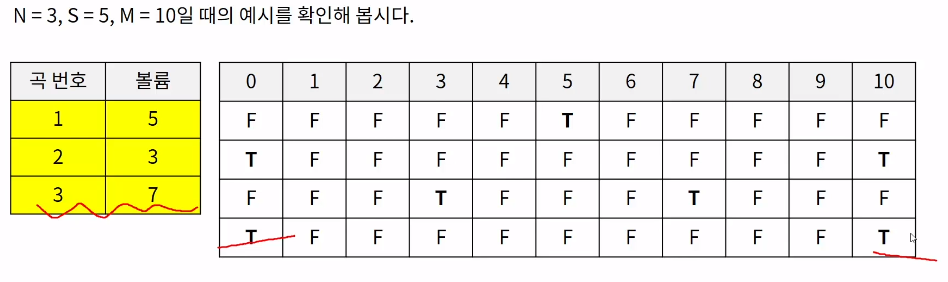

In [11]:
n, s, m = map(int, input().split())
array = list(map(int, input().split()))

dp = [[0]*(m+1) for _ in range(n+1)]
dp[0][s] = 1

for i in range(1, n+1):
    for j in range(m+1):
        if dp[i-1][j] == 0:
            continue
        if j-array[i-1] >=0:
            dp[i][j-array[i-1]] = 1
        if j+array[i-1] <= m:
            dp[i][j+array[i-1]] = 1

result = -1

for i in range(m, -1, -1):
    if dp[n][i] == 1:
        result = i
        break
        
print(result)

3 5 10
5 3 7
10


In [12]:
dp

[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

In [ ]:
# acmicpc.net/problem/2655

# 야 이문제는 '상'인데